In [25]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Generic Data Cleaning and EDA
Import Data and Check the properties

In [26]:
df=pd.read_csv("Complications - Hospital.csv",encoding='latin1')


In [27]:
df.head()


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,331,3.8,2.6,5.5,NaN,04/01/2012,03/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different than the National Rate,4549,3.32,1.25,5.38,NaN,07/01/2013,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Blood stream infection after surgery,PSI_13_POST_SEPSIS,No Different than the National Rate,578,5.72,0.00,11.48,NaN,07/01/2013,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,A wound that splits open after surgery on the...,PSI_14_POSTOP_DEHIS,No Different than the National Rate,445,2.72,0.65,4.79,NaN,07/01/2013,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Accidental cuts and tears from medical treatment,PSI_15_ACC_LAC,No Different than the National Rate,16429,1.35,0.76,1.95,NaN,07/01/2013,06/30/2015


In [28]:
df.shape


(52998, 18)

In [29]:
# Check the data for percentage of null values

round((df.isnull().sum()/df.isnull().count())*100,2)

Provider ID              0.00
Hospital Name            0.00
Address                  0.00
City                     0.00
State                    0.00
ZIP Code                 0.00
County Name              0.31
Phone Number             0.00
Measure Name             0.00
Measure ID               0.00
Compared to National     0.00
Denominator              0.00
Score                    0.00
Lower Estimate           0.00
Higher Estimate          0.00
Footnote                58.73
Measure Start Date       0.00
Measure End Date         0.00
dtype: float64

In [30]:
#Dropping columns having more than 50% null values and eliminating rows having null values
df= df.dropna(axis=1, thresh=int(0.5*len(df)))
df.shape

(52998, 17)

In [31]:
df=df.dropna(axis=0, how='any')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52833 entries, 0 to 52997
Data columns (total 17 columns):
Provider ID             52833 non-null int64
Hospital Name           52833 non-null object
Address                 52833 non-null object
City                    52833 non-null object
State                   52833 non-null object
ZIP Code                52833 non-null int64
County Name             52833 non-null object
Phone Number            52833 non-null int64
Measure Name            52833 non-null object
Measure ID              52833 non-null object
Compared to National    52833 non-null object
Denominator             52833 non-null object
Score                   52833 non-null object
Lower Estimate          52833 non-null object
Higher Estimate         52833 non-null object
Measure Start Date      52833 non-null object
Measure End Date        52833 non-null object
dtypes: int64(3), object(14)
memory usage: 7.3+ MB


Removing unwanted data -
This step will be specific to your dataset
data where most of the metrics are not available/not applicable wont give any info so removing such records. Address , city, state can be removed as we have Zip Code

In [33]:
df=df.drop(["Address","City","State","Phone Number","County Name"],axis=1)


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52833 entries, 0 to 52997
Data columns (total 12 columns):
Provider ID             52833 non-null int64
Hospital Name           52833 non-null object
ZIP Code                52833 non-null int64
Measure Name            52833 non-null object
Measure ID              52833 non-null object
Compared to National    52833 non-null object
Denominator             52833 non-null object
Score                   52833 non-null object
Lower Estimate          52833 non-null object
Higher Estimate         52833 non-null object
Measure Start Date      52833 non-null object
Measure End Date        52833 non-null object
dtypes: int64(2), object(10)
memory usage: 5.2+ MB


In [35]:
df=df.fillna(0)

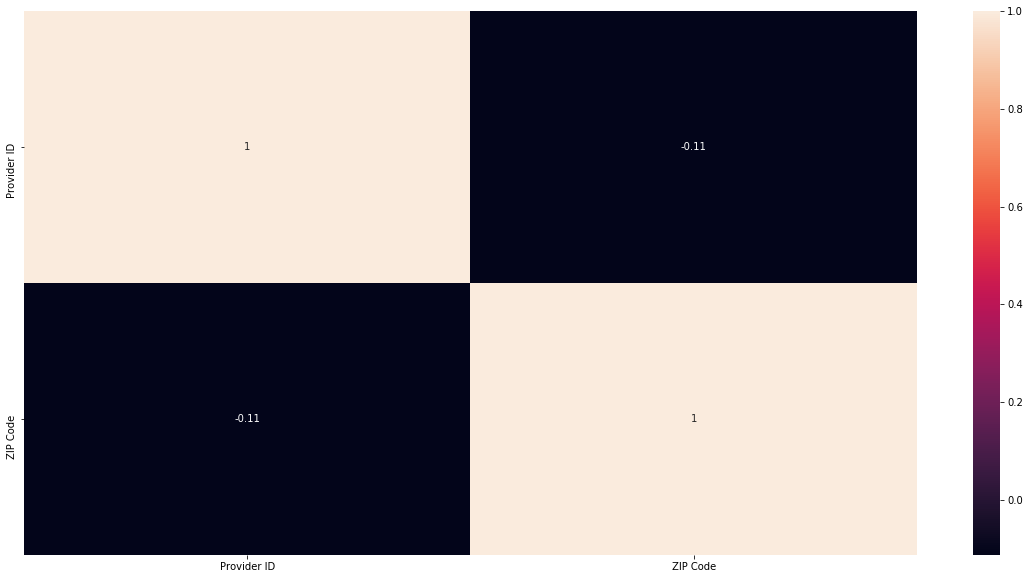

In [36]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()


We can see that there is no significant correlation amoung the columns ; hence heekping all these columns in the dataset for now ; we can later remove certain fields when we merge it to other datasets

In [39]:
#Writing cleaned data to another file
df.to_csv('Complications_Cleaned.csv')

In [40]:
Complications_Cleaned = df[:]
Complications_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52833 entries, 0 to 52997
Data columns (total 12 columns):
Provider ID             52833 non-null int64
Hospital Name           52833 non-null object
ZIP Code                52833 non-null int64
Measure Name            52833 non-null object
Measure ID              52833 non-null object
Compared to National    52833 non-null object
Denominator             52833 non-null object
Score                   52833 non-null object
Lower Estimate          52833 non-null object
Higher Estimate         52833 non-null object
Measure Start Date      52833 non-null object
Measure End Date        52833 non-null object
dtypes: int64(2), object(10)
memory usage: 5.2+ MB
